In [156]:
#Preprocessing of Abalone dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Choose which dataset to load
datasets = ['abalone', 'wine']

use_dataset = 0
print("Use dataset ", datasets[use_dataset])

if datasets[use_dataset] == 'abalone':
    df = pd.read_csv(r"C:/Users/15485/Desktop/UWaterloo_Academics/ECE657A/Assignments/Assignment2/Assignment2_Submission/abalone.csv", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], sep = ',')


Use dataset  abalone


In [116]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [117]:
#Data Summarization
abalone_describe = df.describe()
print(abalone_describe)

summarize = pd.DataFrame(columns=['mean', 'median','variance','skew','kurtosis'])
summarize['mean'] = df.mean()
summarize['median'] = df.median()
summarize['variance'] = df.var()
summarize['skew'] = df.skew()
summarize['kurtosis'] = df.kurtosis()
display(summarize)

            Length     Diameter       Height  Whole_weight  Sucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000    4177.000000   
mean      0.523992     0.407881     0.139516      0.828742       0.359367   
std       0.120093     0.099240     0.041827      0.490389       0.221963   
min       0.075000     0.055000     0.000000      0.002000       0.001000   
25%       0.450000     0.350000     0.115000      0.441500       0.186000   
50%       0.545000     0.425000     0.140000      0.799500       0.336000   
75%       0.615000     0.480000     0.165000      1.153000       0.502000   
max       0.815000     0.650000     1.130000      2.825500       1.488000   

       Viscera_weight  Shell_weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  


,mean,median,variance,skew,kurtosis
Length,0.523992,0.5450,0.014422,-0.639873,0.064621
Diameter,0.407881,0.4250,0.009849,-0.609198,-0.045476
Height,0.139516,0.1400,0.001750,3.128817,76.025509
Whole_weight,0.828742,0.7995,0.240481,0.530959,-0.023644
Sucked_weight,0.359367,0.3360,0.049268,0.719098,0.595124
Viscera_weight,0.180594,0.1710,0.012015,0.591852,0.084012
Shell_weight,0.238831,0.2340,0.019377,0.620927,0.531926
Rings,9.933684,9.0000,10.395266,1.114102,2.330687


In [118]:
missing_values = df.isna().sum()
print(missing_values)

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Sucked_weight     0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


Is there any missing data?
Answer to this question can given by observing the output of isna(), we can see that for for all the columns we have got value 0, which means that there are no missing values for any of the columns in the abalone dataset.  

In [119]:
if (missing_values>0).any():
    print("There are {} missing values\n".format(np.sum(missing_values)))
else:
    print("there are no missing data")

there are no missing data


In [120]:
sex_describe = df['Sex'].describe()
sex_unique = df['Sex'].unique()
print(sex_describe)
print("Total Unique Sex: ", sex_unique)
df['Sex'].value_counts()

count     4177
unique       3
top          M
freq      1528
Name: Sex, dtype: object
Total Unique Sex:  ['M' 'F' 'I']


M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Finding correlations between 2 variables/columns in abalone dataset

In [121]:
features = df.select_dtypes(include=[np.number])
features_correlation = features.corr()
print(features_correlation)

                  Length  Diameter    Height  Whole_weight  Sucked_weight  \
Length          1.000000  0.986812  0.827554      0.925261       0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452       0.893162   
Height          0.827554  0.833684  1.000000      0.819221       0.774972   
Whole_weight    0.925261  0.925452  0.819221      1.000000       0.969405   
Sucked_weight   0.897914  0.893162  0.774972      0.969405       1.000000   
Viscera_weight  0.903018  0.899724  0.798319      0.966375       0.931961   
Shell_weight    0.897706  0.905330  0.817338      0.955355       0.882617   
Rings           0.556720  0.574660  0.557467      0.540390       0.420884   

                Viscera_weight  Shell_weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole_weight          0.966375      0.955355  0.540390  
Sucked_weight        

finding the correlation w.r.t to rings

In [122]:
print(features_correlation['Rings'])

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole_weight      0.540390
Sucked_weight     0.420884
Viscera_weight    0.503819
Shell_weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64


from the above block, we can see that only shell weight is somewhat correlated with rings columns. apart from this all other columns/parameters are not that much correlated with the rings. this would cause problem in the ring classification. 1 represents that the variables are highly correlated and 0 represents that variableas are not correlated. 

<AxesSubplot:title={'center':'Correlation heatmap for Abalone dataset'}>

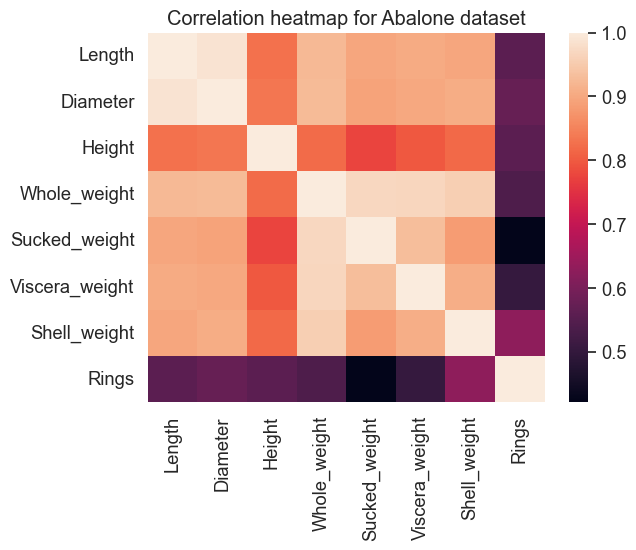

In [123]:
plt.title("Correlation heatmap for Abalone dataset")
sns.heatmap(features_correlation)

<AxesSubplot:title={'center':'Gaussian Curve for Rings on Log Normal Scale'}, xlabel='Rings', ylabel='Density'>

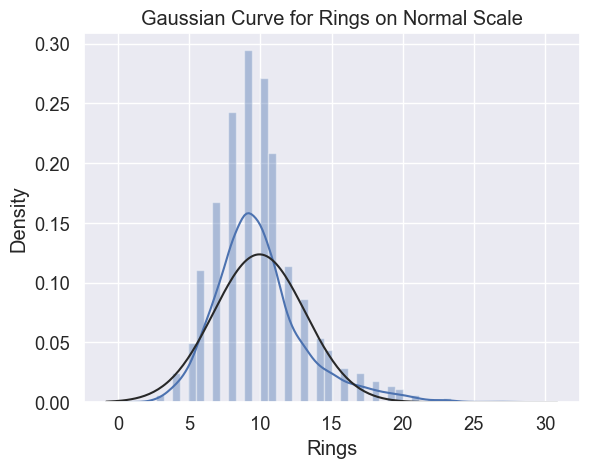

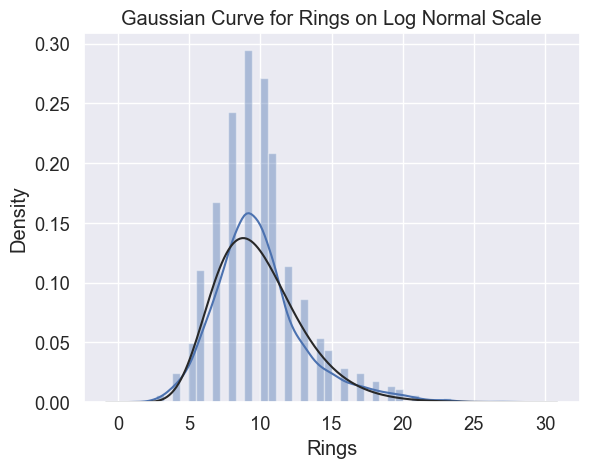

In [124]:
#Checking the histogram for Rings
rings = df['Rings']
plt.figure(1)
plt.title("Gaussian Curve for Rings on Normal Scale")
sns.distplot(rings,kde=True,fit=st.norm)

plt.figure(2)
plt.title("Gaussian Curve for Rings on Log Normal Scale")
sns.distplot(rings,kde=True,fit=st.lognorm)

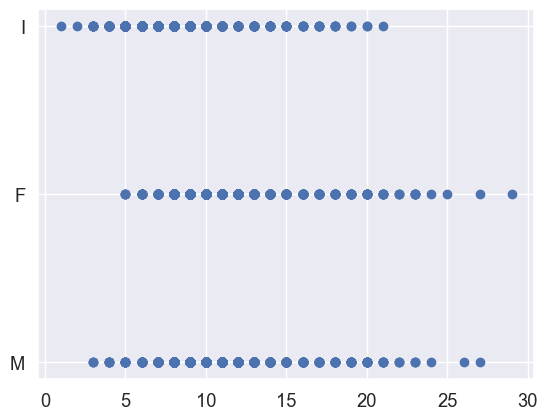

In [125]:
# Check any relationship between Sex and Rings
plt.scatter(y=df['Sex'], x=df['Rings'])

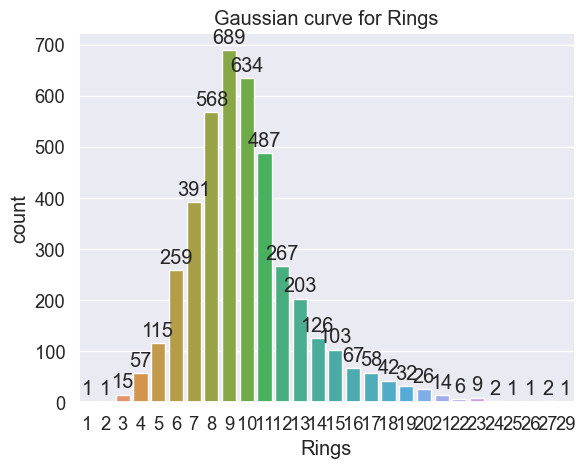

In [126]:
ax = sns.countplot(df['Rings'])
plt.title('Gaussian curve for Rings')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

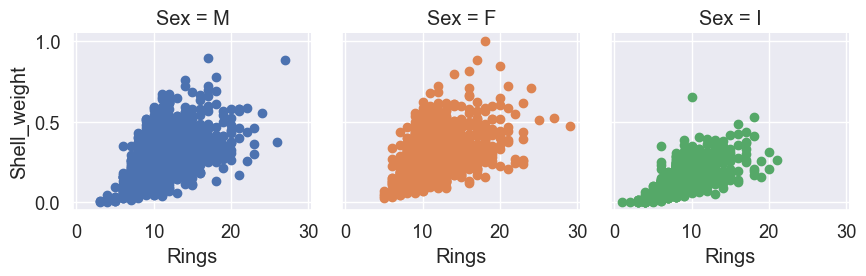

In [127]:
Rings_facet = sns.FacetGrid(df, col="Sex", hue="Sex")
Rings_facet=Rings_facet.map(plt.scatter,"Rings", "Shell_weight")

Text(0, 0.5, 'Shell_weight')

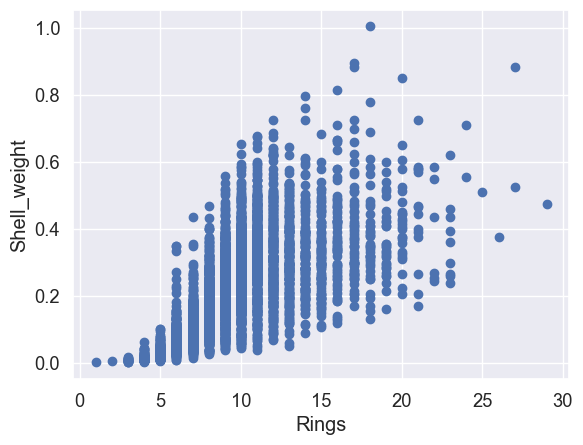

In [128]:
plt.scatter(x=df['Rings'], y=df['Shell_weight'])
plt.xlabel('Rings')
plt.ylabel('Shell_weight')

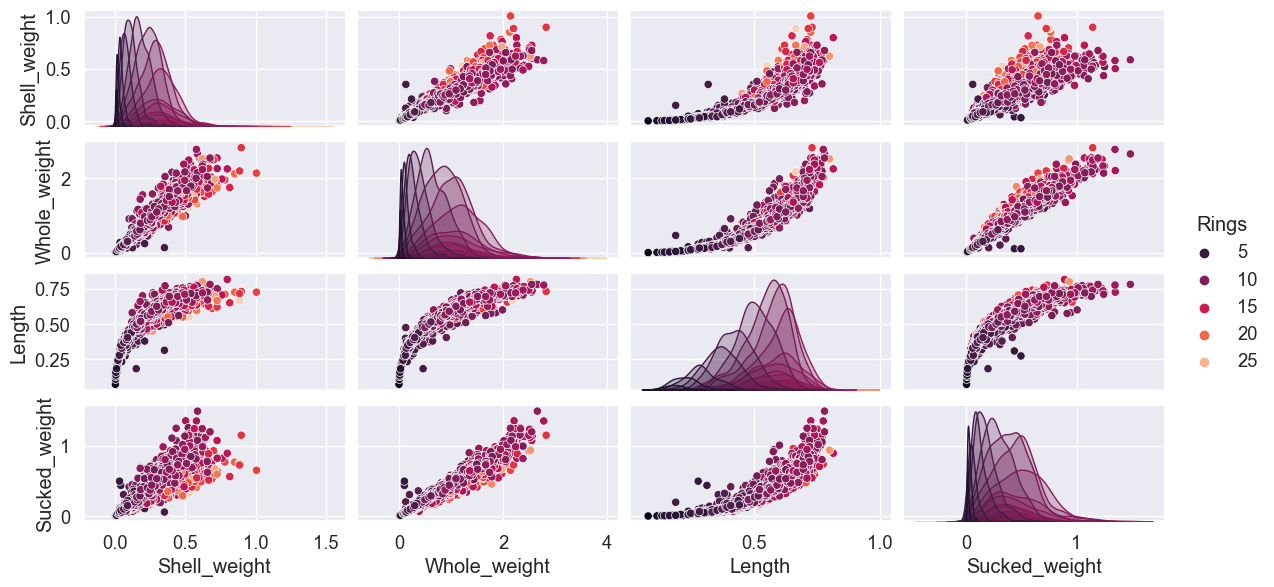

In [129]:
sns.pairplot(df, vars=["Shell_weight", "Whole_weight", "Length", "Sucked_weight"], hue='Rings', palette="rocket", height=1.5, aspect=2)

Text(0, 0.5, 'Feature')

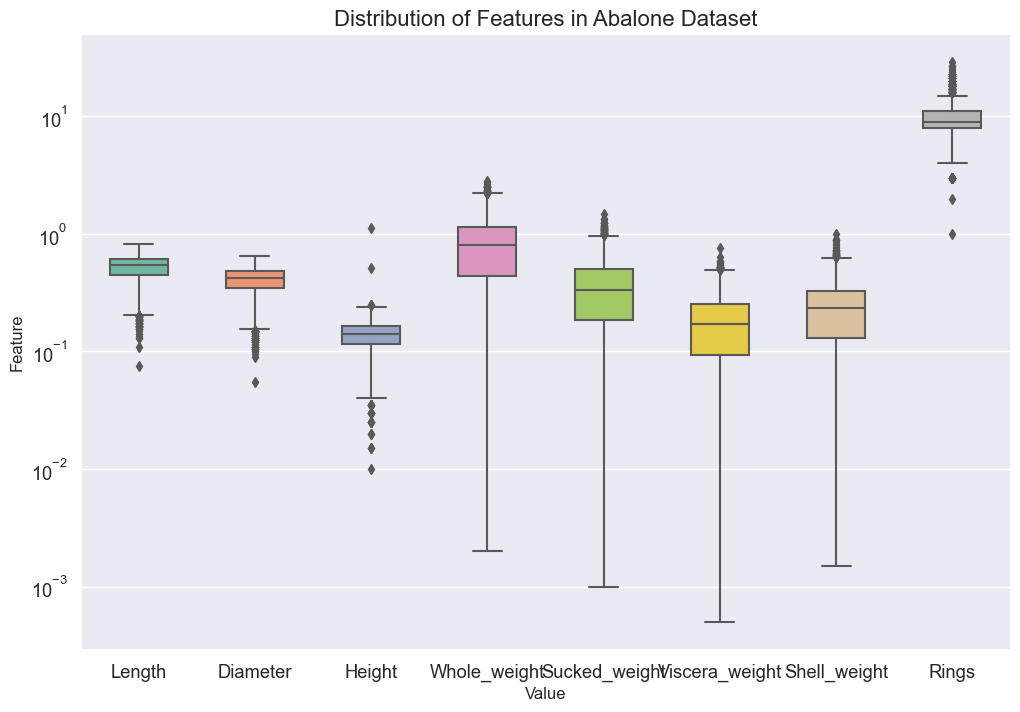

In [130]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, orient="v", palette="Set2", whis=1.5, width=0.5)
plt.yscale('log')
plt.title("Distribution of Features in Abalone Dataset", fontsize=16)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)

Starting Normalization from here

In [131]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
scaler = StandardScaler()
scaler.fit(df[numeric_cols])
abalone_norm = df.copy()
abalone_norm[numeric_cols] = scaler.transform(df[numeric_cols])
print(df.head())


  Sex  Length  Diameter  Height  Whole_weight  Sucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140         0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255         0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770         0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160         0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050         0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [132]:
X = df.drop(['Rings','Sex'], axis=1)
y = df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40) 

X_Norm = abalone_norm.drop(['Rings','Sex'], axis=1)
#y_Norm = abalone_norm['Rings']
y_Norm = y
X_train_Norm, X_test_Norm, y_train_Norm, y_test_Norm = train_test_split(X_Norm, y_Norm, test_size=0.2, random_state = 40) 

In [133]:
display("Training Data Original")
display(X_train.head())
display(X_train.describe())

display("Testing Data Original")
display(X_test.head())
display(X_test.describe())

display("Training Data Z Normalized")
display(X_train_Norm.head())
display(X_train_Norm.describe())

display("Testing Data Z Normalized")
display(X_test_Norm.head())
display(X_test_Norm.describe())

'Training Data Original'

,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
1794,0.575,0.450,0.130,0.8145,0.4030,0.1715,0.2130
1466,0.515,0.425,0.145,0.9365,0.4970,0.1810,0.2185
2275,0.655,0.525,0.185,1.2590,0.4870,0.2215,0.4450
3929,0.650,0.515,0.215,1.4980,0.5640,0.3230,0.4250
1955,0.645,0.510,0.180,1.6195,0.7815,0.3220,0.4675


,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,0.523590,0.407685,0.139397,0.829025,0.360037,0.180496,0.238490
std,0.120856,0.099806,0.042632,0.493738,0.223379,0.110090,0.139733
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.438500,0.184500,0.092500,0.130000
50%,0.545000,0.425000,0.140000,0.797000,0.336000,0.170500,0.233000
75%,0.615000,0.480000,0.165000,1.153000,0.505500,0.253000,0.326000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


'Testing Data Original'

,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
341,0.62,0.510,0.205,1.3475,0.4775,0.2565,0.480
3413,0.49,0.395,0.120,0.6740,0.3325,0.1235,0.185
1088,0.45,0.340,0.120,0.4925,0.2410,0.1075,0.120
98,0.47,0.370,0.130,0.5225,0.2010,0.1330,0.165
3661,0.55,0.415,0.150,0.7915,0.3535,0.1760,0.236


,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,0.525598,0.408666,0.139994,0.827610,0.356690,0.180982,0.240193
std,0.117049,0.096998,0.038462,0.477058,0.216322,0.107758,0.137137
min,0.160000,0.110000,0.015000,0.014500,0.005500,0.002500,0.005000
25%,0.453750,0.350000,0.115000,0.451500,0.190500,0.095375,0.130875
50%,0.545000,0.425000,0.140000,0.806000,0.336750,0.171000,0.235000
75%,0.615000,0.481250,0.165000,1.157125,0.492625,0.252875,0.332625
max,0.800000,0.630000,0.240000,2.526000,1.351000,0.590000,0.885000


'Training Data Z Normalized'

,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
1794,0.424788,0.424464,-0.227545,-0.029046,0.196599,-0.082970,-0.185585
1466,-0.074885,0.172519,0.131117,0.219766,0.620144,0.003708,-0.146070
2275,1.091018,1.180300,1.087551,0.877486,0.575086,0.373230,1.481249
3929,1.049379,1.079522,1.804876,1.364912,0.922032,1.299315,1.337556
1955,1.007740,1.029133,0.967997,1.612704,1.902043,1.290191,1.642903


,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,-0.003347,-0.001980,-0.002858,0.000578,0.003019,-0.000887,-0.002449
std,1.006478,1.005828,1.019371,1.006950,1.006500,1.004457,1.003930
min,-3.739154,-3.556267,-3.335953,-1.686092,-1.614731,-1.643173,-1.705134
25%,-0.616198,-0.583316,-0.586208,-0.795876,-0.787917,-0.803766,-0.781909
50%,0.174951,0.172519,0.011563,-0.064736,-0.105289,-0.092094,-0.041893
75%,0.757903,0.726798,0.609334,0.661305,0.658443,0.660635,0.626278
max,2.423480,2.440025,23.683287,4.072271,5.085388,5.286500,5.504642


'Testing Data Z Normalized'

,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
341,0.799543,1.029133,1.565767,1.057976,0.532281,0.692569,1.732711
3413,-0.283082,-0.129815,-0.466653,-0.315588,-0.121059,-0.520922,-0.386755
1088,-0.616198,-0.684094,-0.466653,-0.685746,-0.533340,-0.666906,-0.853756
98,-0.449640,-0.381760,-0.227545,-0.624563,-0.713572,-0.434244,-0.530447
3661,0.216591,0.071741,0.250672,-0.075953,-0.026438,-0.041912,-0.020339


,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,0.013374,0.007911,0.011420,-0.002309,-0.012063,0.003544,0.009788
std,0.974773,0.977526,0.919654,0.972932,0.974702,0.983182,0.985280
min,-3.031284,-3.001988,-2.977291,-1.660599,-1.594455,-1.624925,-1.679988
25%,-0.584968,-0.583316,-0.586208,-0.769363,-0.760882,-0.777534,-0.775623
50%,0.174951,0.172519,0.011563,-0.046381,-0.101910,-0.087532,-0.027523
75%,0.757903,0.739396,0.609334,0.669718,0.600431,0.659495,0.673876
max,2.298562,2.238469,2.402646,3.461458,4.468094,3.735421,4.642486


In [134]:
# Apply KNN classification for original Data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_initial_score = accuracy_score(y_test, knn_pred)
knn_initial_score

0.20334928229665072

In [135]:
# Apply KNN classification for Normalized Data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_Norm, y_train)
knn_pred = knn.predict(X_test_Norm)
knn_initial_score = accuracy_score(y_test, knn_pred)
knn_initial_score

0.215311004784689

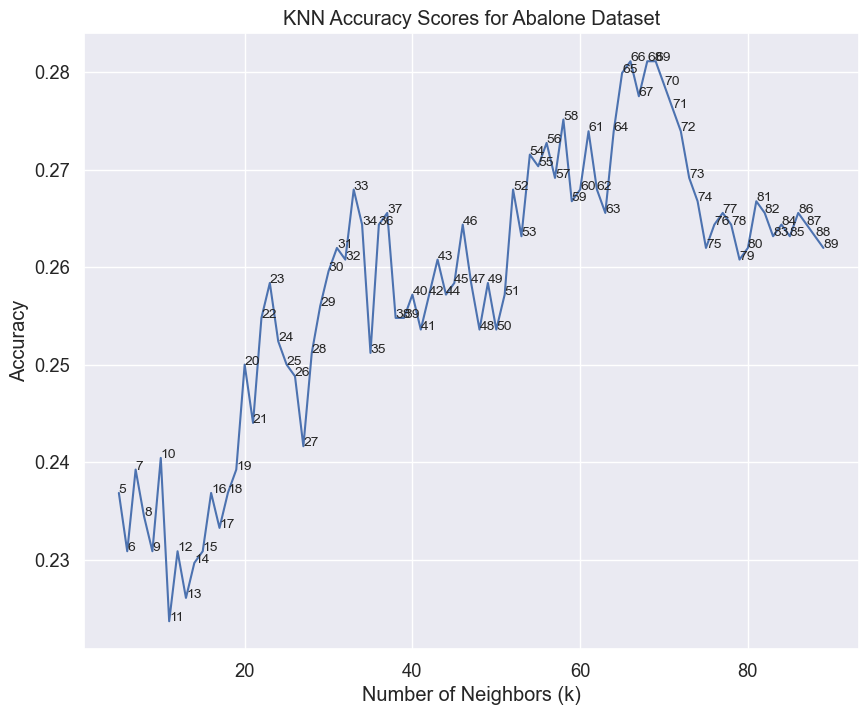

In [136]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
accuracy_score = []
for k in range(5,90):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracy_score = recall_score(y_test, knn_pred, average='micro')
    accuracy_score.append(knn_accuracy_score)
    #knn_accuracy_score = accuracy_score(y_test, knn_pred)
    #knn_accuracy_score
    #print("The Accuracy for k={} is {}".format(k, knn_accuracy_score))

plt.figure(figsize=(10,8))
for i, k in enumerate(range(5, 90)):
    plt.text(k, accuracy_score[i], str(k), fontsize=10)
   

plt.plot(range(5,90), accuracy_score)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Scores for Abalone Dataset')
plt.show()

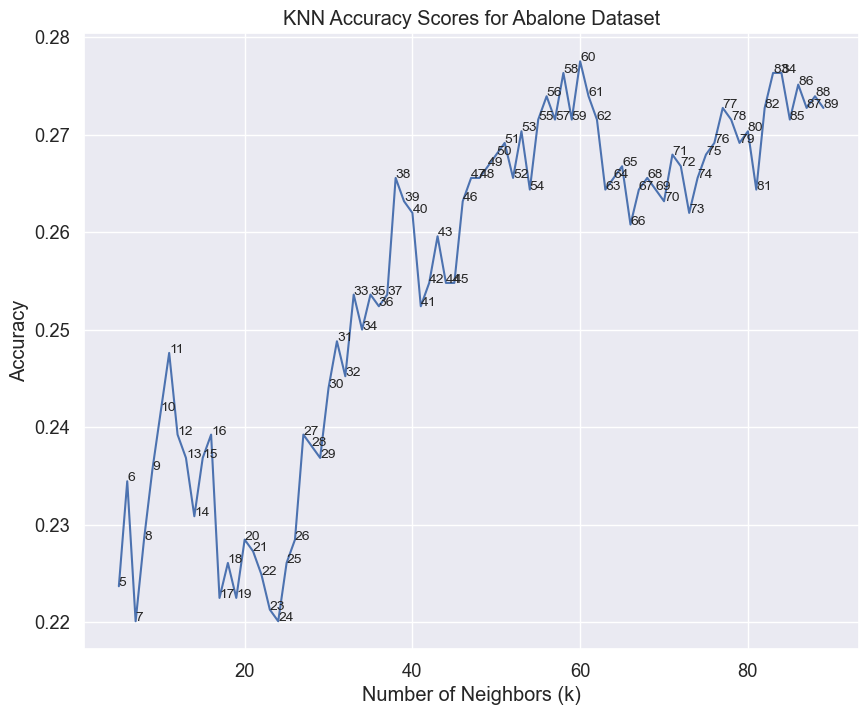

In [137]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
accuracy_score = []
for k in range(5,90):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_Norm, y_train)
    knn_pred = knn.predict(X_test_Norm)
    knn_accuracy_score = recall_score(y_test, knn_pred, average='micro')
    accuracy_score.append(knn_accuracy_score)
    #knn_accuracy_score = accuracy_score(y_test, knn_pred)
    #knn_accuracy_score
    #print("The Accuracy for k={} is {}".format(k, knn_accuracy_score))

plt.figure(figsize=(10,8))
plt.plot(range(5,90), accuracy_score)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Scores for Abalone Dataset')

for i, k in enumerate(range(5, 90)):
    plt.text(k, accuracy_score[i], str(k), fontsize=10)

plt.show()

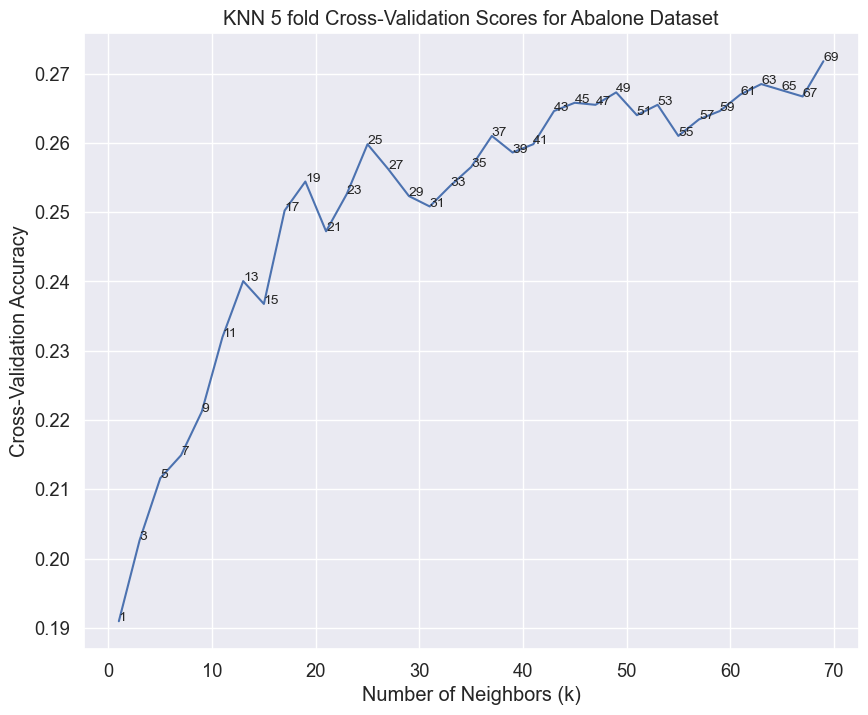

In [138]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k_list = np.arange(1, 70, 2)
# Create an empty list to store cross-validation scores
cross_validate_scores = []

# Use 5-fold cross-validation to evaluate model performance for each value of k
cross_validation = 5
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_Norm, y_train, cv=cross_validation, scoring='accuracy')
    cross_validate_scores.append(scores.mean())

# Plot the cross-validation scores for each value of k
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(k_list, cross_validate_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN {} fold Cross-Validation Scores for Abalone Dataset'.format(cross_validation))

for i, k in enumerate(range(1, 70, 2)):
    plt.text(k, cross_validate_scores[i], str(k), fontsize=10)

plt.show()

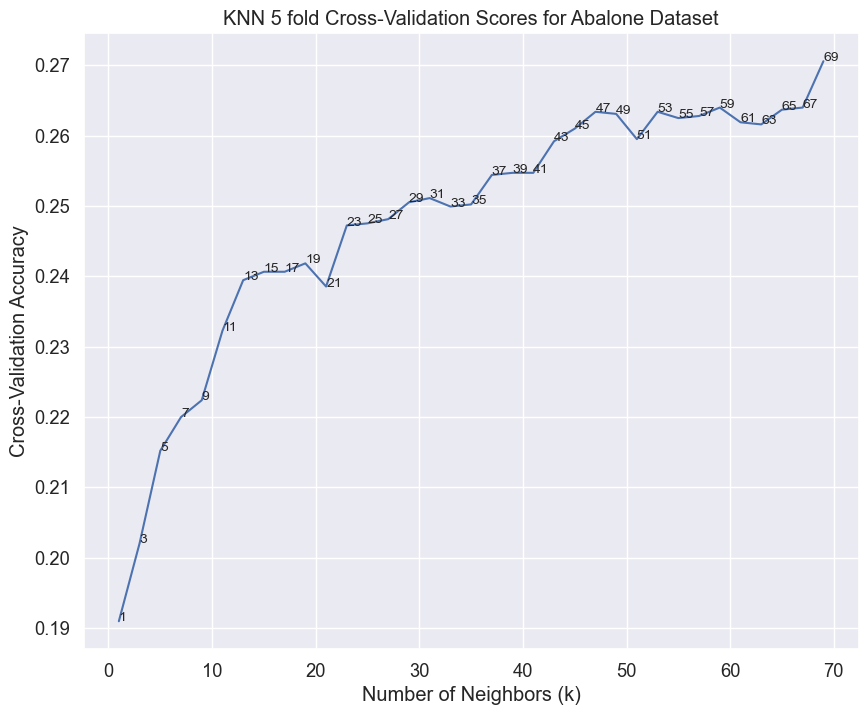

In [139]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k_list = np.arange(1, 70, 2)
# Create an empty list to store cross-validation scores
cross_validate_scores = []

# Use 5-fold cross-validation to evaluate model performance for each value of k
cross_validation = 5
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train_Norm, y_train, cv=cross_validation, scoring='accuracy')
    cross_validate_scores.append(scores.mean())

# Plot the cross-validation scores for each value of k
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(k_list, cross_validate_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN {} fold Cross-Validation Scores for Abalone Dataset'.format(cross_validation))

for i, k in enumerate(range(1, 70, 2)):
    plt.text(k, cross_validate_scores[i], str(k), fontsize=10)

plt.show()

In [140]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=40)
#oversampled_df = df.copy()
X_train_sampled, y_train_sampled = os.fit_resample(X_train, y_train)
X_test_sampled, y_test_sampled = os.fit_resample(X_test, y_test)
#print(y_train_sampled)

# numeric_cols = df.select_dtypes(include='number').columns.tolist()
# numeric_cols = numeric_cols
# scaler = StandardScaler()
# scaler.fit(df[numeric_cols])
# abalone_norm = df.copy()
# abalone_norm[numeric_cols] = scaler.transform(df[numeric_cols])
# print(df.head())

# X_Norm = abalone_norm.drop(['Rings','Sex'], axis=1)
# #y_Norm = abalone_norm['Rings']
# y_Norm = y
# X_train_Norm, X_test_Norm, y_train_Norm, y_test_Norm = train_test_split(X_Norm, y_Norm, test_size=0.2, random_state = 40)

# Apply Z-score 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sampled.iloc[:, 1:] = sc.fit_transform(X_train_sampled.iloc[:, 1:])
X_test_sampled = sc.fit_transform(X_test_sampled)

from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=40)
X_train_norm_sampled, y_train_norm_sampled = os.fit_resample(X_train_Norm, y_train_Norm)

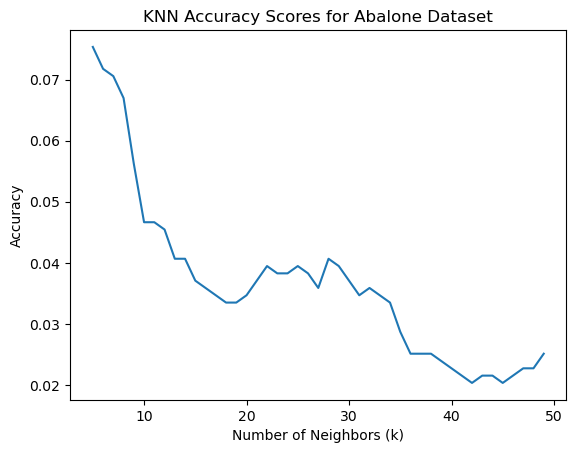

In [30]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
accuracy_score = []
for k in range(5,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_norm_sampled, y_train_norm_sampled)
    knn_pred = knn.predict(X_test)
    knn_accuracy_score = recall_score(y_test, knn_pred, average='micro')
    accuracy_score.append(knn_accuracy_score)
    #knn_accuracy_score = accuracy_score(y_test, knn_pred)
    #knn_accuracy_score
    #print("The Accuracy for k={} is {}".format(k, knn_accuracy_score))

plt.plot(range(5,50), accuracy_score)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Scores for Abalone Dataset')
plt.show()

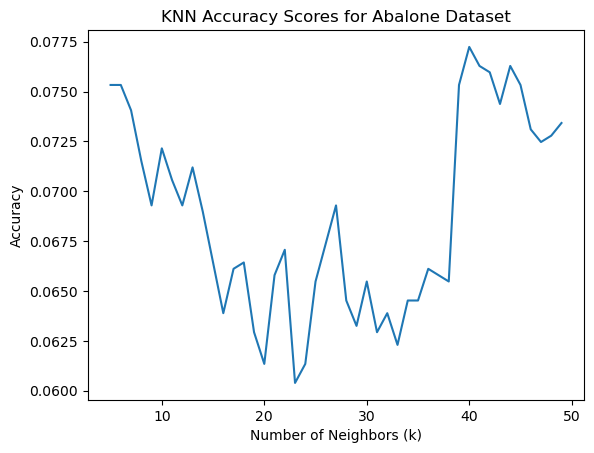

In [31]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
accuracy_score = []
for k in range(5,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sampled, y_train_sampled)
    knn_pred = knn.predict(X_test_sampled)
    knn_accuracy_score = recall_score(y_test_sampled, knn_pred, average='micro')
    accuracy_score.append(knn_accuracy_score)
    #knn_accuracy_score = accuracy_score(y_test, knn_pred)
    #knn_accuracy_score
    #print("The Accuracy for k={} is {}".format(k, knn_accuracy_score))

plt.plot(range(5,50), accuracy_score)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Scores for Abalone Dataset')
plt.show()

Assignment2

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sys

df = pd.read_csv(r"C:/Users/15485/Desktop/UWaterloo_Academics/ECE657A/Assignments/Assignment2/Assignment2_Submission/abalone.csv", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], sep = ',')
X = df.iloc[:, 1:8].values  # extract features
y = df.iloc[:, -1].values   # extract labels
print(y)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

cov_mat = np.cov(X_std.T)
print("Covariance Matrix Calculated using numpy:\n")
np.savetxt(sys.stdout, cov_mat, fmt='%.4f', delimiter='\t')


[15  7  9 ...  9 10 12]
Covariance Matrix Calculated using numpy:

1.0002	0.9870	0.8278	0.9255	0.8981	0.9032	0.8979
0.9870	1.0002	0.8339	0.9257	0.8934	0.8999	0.9055
0.8278	0.8339	1.0002	0.8194	0.7752	0.7985	0.8175
0.9255	0.9257	0.8194	1.0002	0.9696	0.9666	0.9556
0.8981	0.8934	0.7752	0.9696	1.0002	0.9322	0.8828
0.9032	0.8999	0.7985	0.9666	0.9322	1.0002	0.9079
0.8979	0.9055	0.8175	0.9556	0.8828	0.9079	1.0002


Variance explained by each principal component:
 [0.9078731478516083, 0.03991890899342265, 0.023906381975154992, 0.016295977883821613, 0.009236274060776192, 0.0018182993981407179, 0.0009510098370754434]
Cumulative variance explained by each principal component:
 [0.90787315 0.94779206 0.97169844 0.98799442 0.99723069 0.99904899
 1.        ]
Number of principal components needed to explain 95% of the variance: 3


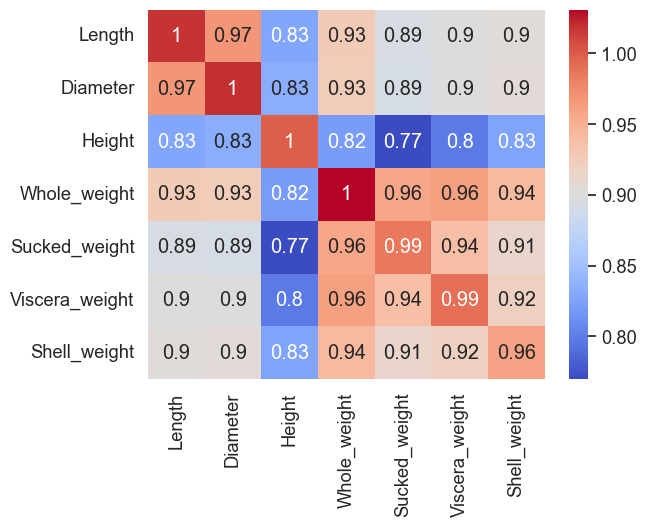

Covariance matrix of the principal components:
1.0177	0.9687	0.8271	0.9262	0.8949	0.9011	0.9041
0.9687	1.0189	0.8335	0.9257	0.8937	0.9005	0.9046
0.8271	0.8335	0.9985	0.8199	0.7696	0.7973	0.8264
0.9262	0.9257	0.8199	1.0310	0.9568	0.9610	0.9412
0.8949	0.8937	0.7696	0.9568	0.9858	0.9376	0.9129
0.9011	0.9005	0.7973	0.9610	0.9376	0.9909	0.9203
0.9041	0.9046	0.8264	0.9412	0.9129	0.9203	0.9590


Eigenvalues of the principal components:
6.3566
0.2795
0.1674


Eigenvectors of the principal components:
0.3833	0.3836	0.3481	0.3907	0.3782	0.3815	0.3789
0.0379	0.0653	0.8668	-0.2333	-0.3480	-0.2529	-0.0584
-0.5933	-0.5854	0.3149	0.2308	0.2316	0.2703	0.1621




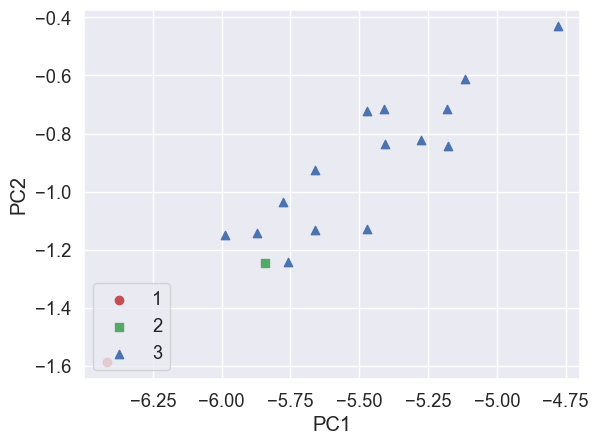

In [105]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance explained by each principal component:\n", var_exp)
print("Cumulative variance explained by each principal component:\n", cum_var_exp)

# Calculate the number of principal components needed to explain 95% of the variance
n_components = np.argmax(cum_var_exp >= 0.95) + 1
print("Number of principal components needed to explain 95% of the variance:", n_components)

pca = PCA(n_components=n_components)
#pca = PCA(n_components=np.argmax(cum_var_exp)+1)
X_pca = pca.fit_transform(X_std)

covariance = pca.get_covariance()
eigen_values = pca.explained_variance_
eigen_vectors = pca.components_

plt.figure()
sns.set(font_scale=1.2)
sns.heatmap(covariance, xticklabels=features.columns, yticklabels=features.columns, cmap="coolwarm", annot=True)
plt.show()

print("Covariance matrix of the principal components:")
np.savetxt(sys.stdout, covariance, fmt='%.4f', delimiter='\t')
print("\n")
print("Eigenvalues of the principal components:")
np.savetxt(sys.stdout, eigen_values, fmt='%.4f', delimiter='\t')
print("\n")
print("Eigenvectors of the principal components:")
np.savetxt(sys.stdout, eigen_vectors, fmt='%.4f', delimiter='\t')
print("\n")

colors = ['r', 'g', 'b']
markers = ['o', 's', '^']
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], color=color, marker=marker, label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()



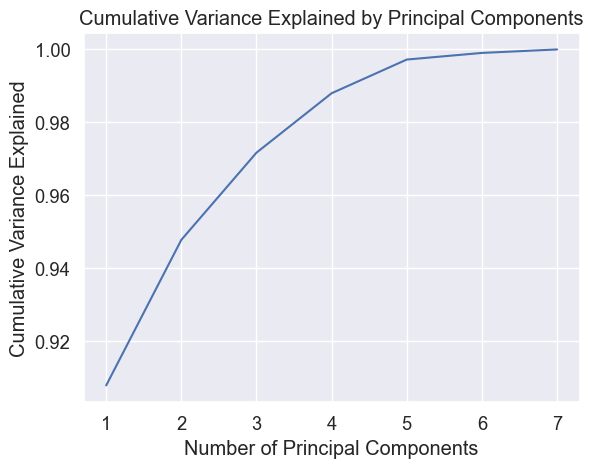

In [152]:
# Plot the cumulative variance explained
plt.plot(range(1, len(cum_var_exp) + 1), cum_var_exp)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()

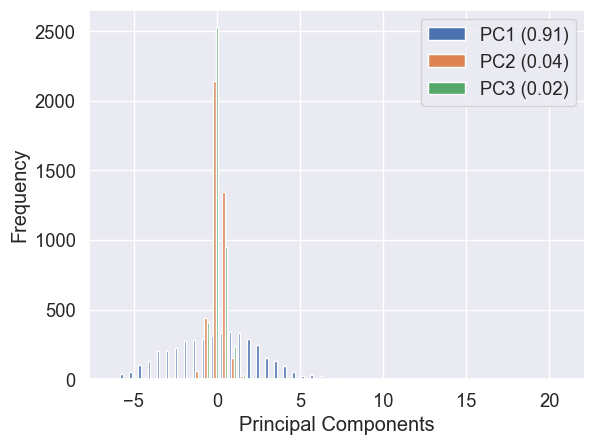

In [106]:
n_components = pca.n_components_
plt.hist(X_pca, bins=50, label=[f'PC{i+1} ({var:.2f})' for i,var in enumerate(pca.explained_variance_ratio_)])
plt.xlabel('Principal Components')
plt.ylabel('Frequency')
plt.legend()
plt.show()

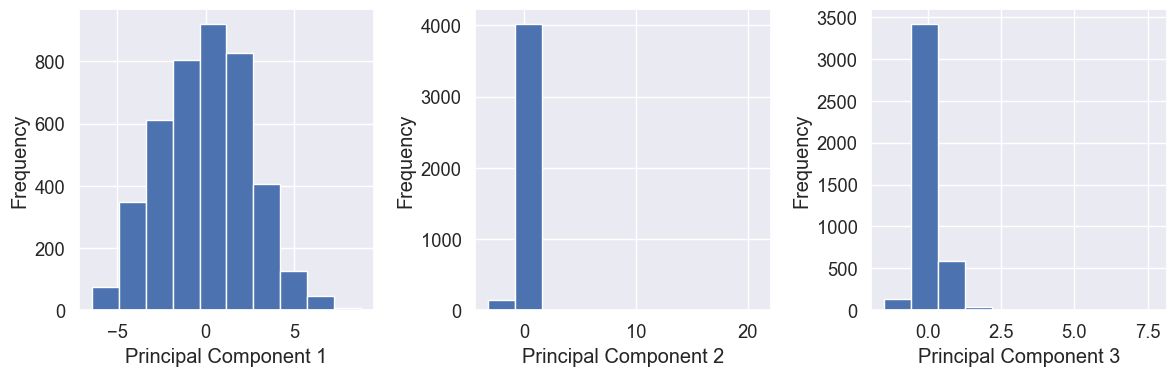

In [107]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axs[i].hist(X_pca[:, i], bins=10)
    axs[i].set_xlabel(f"Principal Component {i+1}")
    axs[i].set_ylabel("Frequency")
fig.tight_layout()
plt.show()


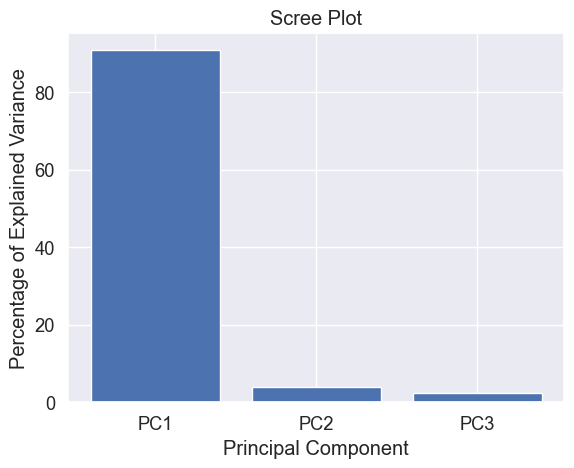

In [108]:
# plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
# plt.xlabel('Principal Component')
# plt.ylabel('Proportion of Variance Explained')
# plt.title('Scree Plot')
# for i, explained_var in enumerate(pca.explained_variance_ratio_):
#     plt.text(i + 1, explained_var + 0.01, f'PC{i+1}', ha='center')
# plt.show()

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

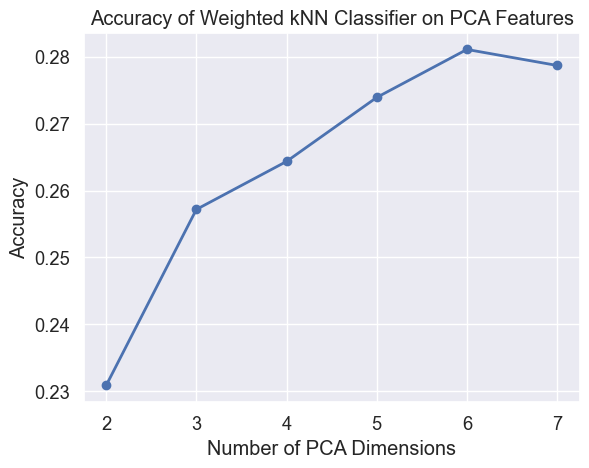

In [109]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

dims = np.arange(2, X.shape[1]+1)
accs = []
for d in dims:
    pca = PCA(n_components=d)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    knn = KNeighborsClassifier(n_neighbors=68, weights='distance')
    knn.fit(X_train_pca, y_train)
    acc = knn.score(X_test_pca, y_test)
    accs.append(acc)

import matplotlib.pyplot as plt
plt.plot(dims, accs, 'bo-', linewidth=2)
plt.xlabel('Number of PCA Dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy of Weighted kNN Classifier on PCA Features')
plt.grid(True)
plt.show()

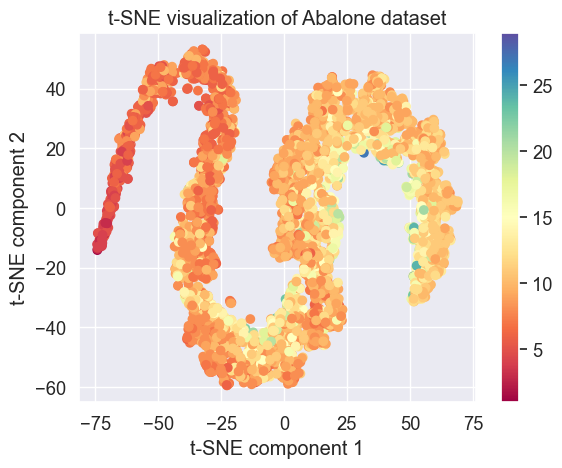

In [111]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

X = df.iloc[:, 1:8].values
y = df.iloc[:, -1].values

tsne = TSNE(n_components=2, perplexity=30.0, random_state=0)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap=plt.cm.Spectral)
plt.colorbar()
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE visualization of Abalone dataset')
plt.show()

In [158]:
#Loading Data set
#if datasets[use_dataset] == 'wine':

wine_r = pd.read_csv("C:/Users/15485/Desktop/UWaterloo_Academics/ECE657A/Assignments/Assignment2/Assignment2_Submission/winequality-red.csv", sep=';')
wine_r["colour"]=1
#Loading Data set
wine_w = pd.read_csv("C:/Users/15485/Desktop/UWaterloo_Academics/ECE657A/Assignments/Assignment2/Assignment2_Submission/winequality-white.csv", sep=';')
wine_w["colour"]=0
D = pd.concat([wine_w,wine_r])



In [159]:
D.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [160]:
#Data Summarization
wine_describe = D.describe()
print(wine_describe)

summarize = pd.DataFrame(columns=['mean', 'median','variance','skew','kurtosis'])
summarize['mean'] = D.mean()
summarize['median'] = D.median()
summarize['variance'] = D.var()
summarize['skew'] = D.skew()
summarize['kurtosis'] = D.kurtosis()
display(summarize)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

,mean,median,variance,skew,kurtosis
fixed acidity,7.215307,7.00000,1.680740,1.723290,5.061161
volatile acidity,0.339666,0.29000,0.027105,1.495097,2.825372
citric acid,0.318633,0.31000,0.021117,0.471731,2.397239
residual sugar,5.443235,3.00000,22.636696,1.435404,4.359272
chlorides,0.056034,0.04700,0.001227,5.399828,50.898051
free sulfur dioxide,30.525319,29.00000,315.041192,1.220066,7.906238
total sulfur dioxide,115.744574,118.00000,3194.720039,-0.001177,-0.371664
density,0.994697,0.99489,0.000009,0.503602,6.606067
pH,3.218501,3.21000,0.025853,0.386839,0.367657
sulphates,0.531268,0.51000,0.022143,1.797270,8.653699


In [161]:
missing_values = df.isna().sum()
print(missing_values)

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Sucked_weight     0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [162]:
if (missing_values>0).any():
    print("There are {} missing values\n".format(np.sum(missing_values)))
else:
    print("there are no missing data")

there are no missing data


In [165]:
quality_describe = D['quality'].describe()
quality_unique = D['quality'].unique()
print(quality_describe)
print("Total unique wine quality: ", quality_unique)
D['quality'].value_counts()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
Total unique wine quality:  [6 5 7 8 4 3 9]


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [166]:
features = D.select_dtypes(include=[np.number])
features_correlation = features.corr()
print(features_correlation)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
colour                     0.486740          0.653036    -0.187397   

                   

In [167]:
print(features_correlation['quality'])

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
colour                 -0.119323
Name: quality, dtype: float64


<AxesSubplot:title={'center':'Correlation heatmap for Wine dataset'}>

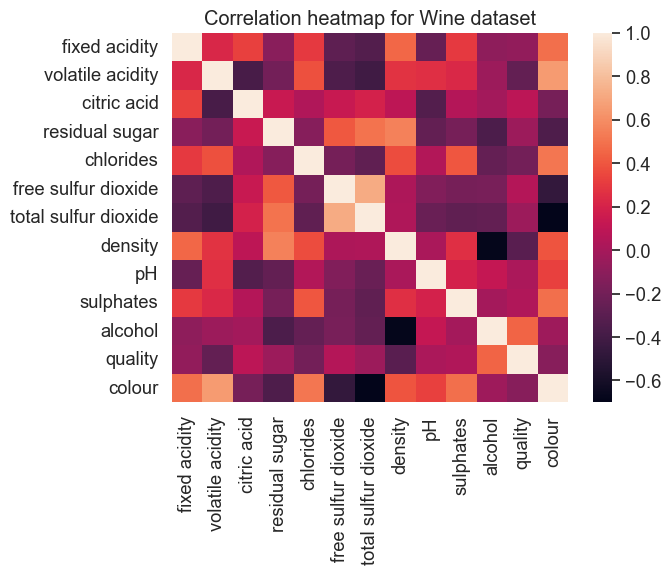

In [168]:
plt.title("Correlation heatmap for Wine dataset")
sns.heatmap(features_correlation)

<AxesSubplot:title={'center':'Gaussian Curve for Quality on Log Normal Scale'}, xlabel='quality', ylabel='Density'>

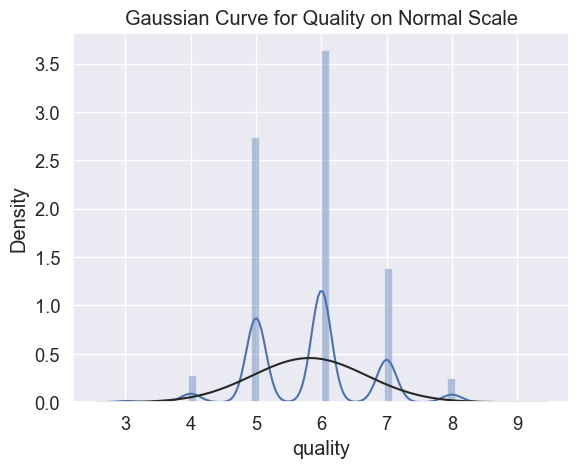

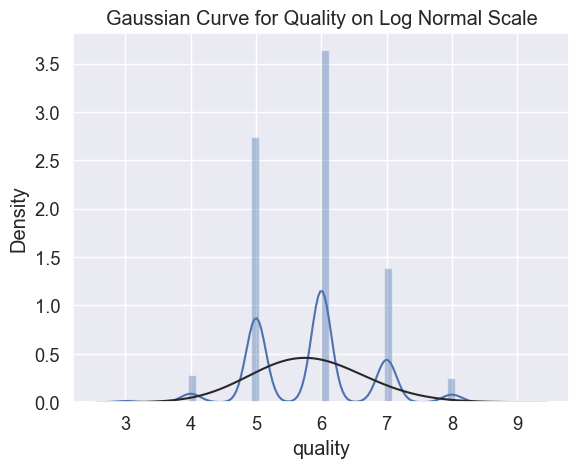

In [169]:
#Checking the histogram for Rings
rings = D['quality']
plt.figure(1)
plt.title("Gaussian Curve for Quality on Normal Scale")
sns.distplot(rings,kde=True,fit=st.norm)

plt.figure(2)
plt.title("Gaussian Curve for Quality on Log Normal Scale")
sns.distplot(rings,kde=True,fit=st.lognorm)

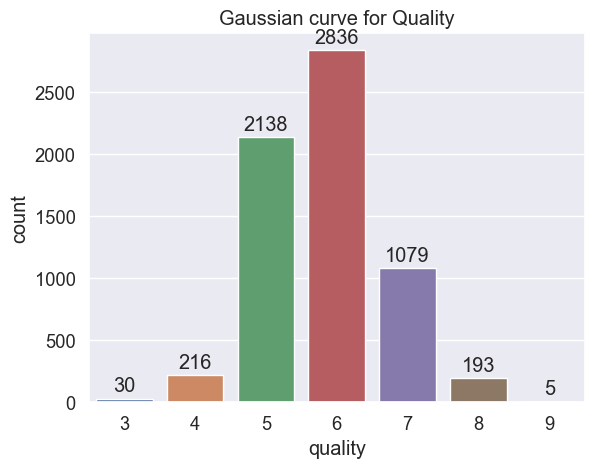

In [172]:
ax = sns.countplot(D['quality'])
plt.title('Gaussian curve for Quality')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')